<a href="https://colab.research.google.com/github/amkayhani/Statistics/blob/main/Non_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quadratic Regression
A investement company is interested in determining the relationship between investment in particular stocks and generated revenue. The following data has been collected for analysis.

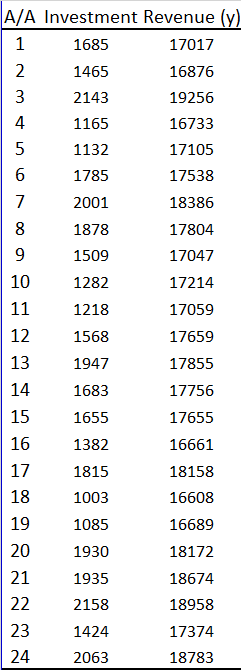

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


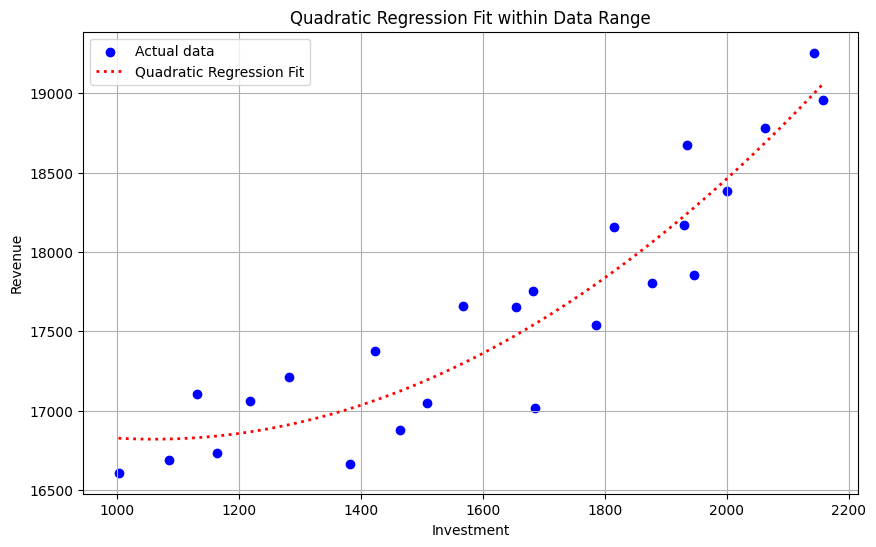

r^2= 0.8743089426424155
y = 0.0019x² + (-3.9487)x + (18913.9464)
    Investment  Investment_squared  Revenue
0         1685             2839225    17017
1         1465             2146225    16876
2         2143             4592449    19256
3         1165             1357225    16733
4         1132             1281424    17105
5         1785             3186225    17538
6         2001             4004001    18386
7         1878             3526884    17804
8         1509             2277081    17047
9         1282             1643524    17214
10        1218             1483524    17059
11        1568             2458624    17659
12        1947             3790809    17855
13        1683             2832489    17756
14        1655             2739025    17655
15        1382             1909924    16661
16        1815             3294225    18158
17        1003             1006009    16608
18        1085             1177225    16689
19        1930             3724900    18172
20        1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


data = {
    'Investment': [
        1685, 1465, 2143, 1165, 1132, 1785, 2001, 1878, 1509, 1282, 1218, 1568,
        1947, 1683, 1655, 1382, 1815, 1003, 1085, 1930, 1935, 2158, 1424, 2063
    ],
    'Revenue': [
        17017, 16876, 19256, 16733, 17105, 17538, 18386, 17804, 17047, 17214,
        17059, 17659, 17855, 17756, 17655, 16661, 18158, 16608, 16689, 18172,
        18674, 18958, 17374, 18783
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Prepare the features and target
X = df[['Investment']]
y = df['Revenue']  # Use a Series instead of DataFrame

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


# Add a constant to the features for the intercept
X_poly= sm.add_constant(X_poly)

# Fit the model using Ordinary Least Squares
model = sm.OLS(y, X_poly).fit()

# Predictions
y_pred = model.predict(X_poly)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Getting the model parameters for the formula
const, x1,x2 = model.params

# Since coefs will have three values including the coefficient for the intercept term
equation = f'y = {x2:.4f}x² + ({x1:.4f})x + ({const:.4f})'

# Prepare the range for plotting
x_range = np.linspace(X['Investment'].min(), X['Investment'].max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(x_range, y_range_pred, color='red', linestyle=':', linewidth=2, label='Quadratic Regression Fit')
plt.title('Quadratic Regression Fit within Data Range')
plt.xlabel('Investment')
plt.ylabel('Revenue')
#plt.text(500, 19000, equation, fontsize=12)  # Display the equation on the plot
plt.legend()
plt.grid(True)
plt.show()

# Calculate the square of Revenue after model fitting to avoid affecting the model
df['Investment_squared'] = df['Investment']**2

pd.options.display.float_format = '{:.4f}'.format

print("r^2=",r2)
print(equation)
df2=pd.DataFrame()
df2['Investment']=df['Investment']
df2['Investment_squared']=df['Investment_squared']
df2['Revenue']=df['Revenue']
print(df2)

# Calculate descriptive statistics for Revenue squared
print(df2.describe())


In [11]:
X = df[['Investment']]
y = df['Revenue']

# Calculate residuals
residuals = y - y_pred

# Create a DataFrame for the required table
results_df = pd.DataFrame({
    'Observation': df.index + 1,
    'Fitted value': y_pred,
    'Residuals': residuals
})

print(results_df)

    Observation  Fitted value  Residuals
0             1    17544.4486  -527.4486
1             2    17123.4296  -247.4296
2             3    18998.8435   257.1565
3             4    16839.6411  -106.6411
4             5    16828.8757   276.1243
5             6    17795.3755  -257.3755
6             7    18464.4073   -78.4073
7             8    18062.1419  -258.1419
8             9    17193.2212  -146.2212
9            10    16910.4710   303.5290
10           11    16865.4136   193.5864
11           12    17298.1152   360.8848
12           13    18280.8686  -425.8686
13           14    17539.8097   216.1903
14           15    17476.4288   178.5712
15           16    17011.3948  -350.3948
16           17    17877.9117   280.0883
17           18    16825.6859  -217.6859
18           19    16820.5409  -131.5409
19           20    18225.3342   -53.3342
20           21    18241.5562   432.4438
21           22    19059.6809  -101.6809
22           23    17064.8823   309.1177
23           24 

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# R-squared score
r_square = r2_score(y, y_pred)

# Multiple R would be the square root of R Square for simple linear regression, but since this is polynomial regression, it's the same.
multiple_r = np.sqrt(r_square)

# Adjusted R Square
n = len(X)  # number of observations
p = X_poly.shape[1] - 1  # number of predictors, adjusted for the intercept
adjusted_r_square = 1 - ((1 - r_square) * (n - 1) / (n - p - 1))

# Standard Error of the regression
standard_error = np.sqrt(mean_squared_error(y, y_pred) * (n / (n - p - 1)))

# Observations
observations = n

# Create a DataFrame for the regression statistics
regression_stats = {
    'Multiple R': multiple_r,
    'R Square': r_square,
    'Adjusted R Square': adjusted_r_square,
    'Standard Error': standard_error,
    'Observations': observations
}

regression_stats

{'Multiple R': 0.9350448880360854,
 'R Square': 0.8743089426424155,
 'Adjusted R Square': 0.862338365751217,
 'Standard Error': 288.17968157542566,
 'Observations': 24}

In [ ]:
from scipy import stats
# Calculate ANOVA metrics
SST = np.sum((y - np.mean(y))**2)  # Total sum of squares
SSR = np.sum((y_pred - np.mean(y))**2)  # Regression sum of squares
SSE = np.sum((y - y_pred)**2)  # Sum of squares of residuals
df_regression = 2  # Two predictors (Investment and its square)
df_residual = n - df_regression - 1
MSR = SSR / df_regression
MSE = SSE / df_residual
F = MSR / MSE
p_value_F = stats.f.sf(F, df_regression, df_residual)

# ANOVA table
anova_table = pd.DataFrame({
    'df': [df_regression, df_residual, df_regression + df_residual],
    'SS': [SSR, SSE, SST],
    'MS': [MSR, MSE, ''],
    'F': [F, '', ''],
    'Significance F': [p_value_F, '', '']
}, index=['Regression', 'Residual', 'Total'])


# Get the summary
print(model.summary())
# ANOVA table
anova_table

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     73.04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.49e-10
Time:                        18:38:25   Log-Likelihood:                -168.38
No. Observations:                  24   AIC:                             342.8
Df Residuals:                      21   BIC:                             346.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.891e+04   1358.032     13.927      0.0

,df,SS,MS,F,Significance F
Regression,2,12131277.8519,6065638.9259,73.0382,0.0000
Residual,21,1743998.1063,83047.5289,,
Total,23,13875275.9583,,,


**Normality test for residuals:**

Desriptive statistics Residuals:
count     24.0000
mean       0.0000
std      275.3652
min     -527.4486
25%     -225.1218
50%      -65.8707
75%      261.8984
max      432.4438
Name: Residuals, dtype: float64
Box Plot Values:
Q1: -225.12181166208575, Q3: 261.8984108452323, IQR: 487.02022250731807
Lower Bound for Outliers: -955.6521454230628
Upper Bound for Outliers: 992.4287446062094

Rounded Number of classes: 5
class Range: 191.9784868688126


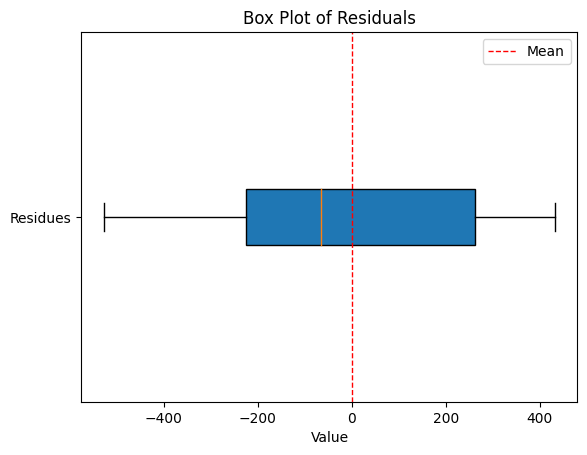

Classes:
   Residuals  Frequency
0  -335.4701          3
1  -143.4916          5
2    48.4868          5
3   240.4653          4
4   432.4438          7 



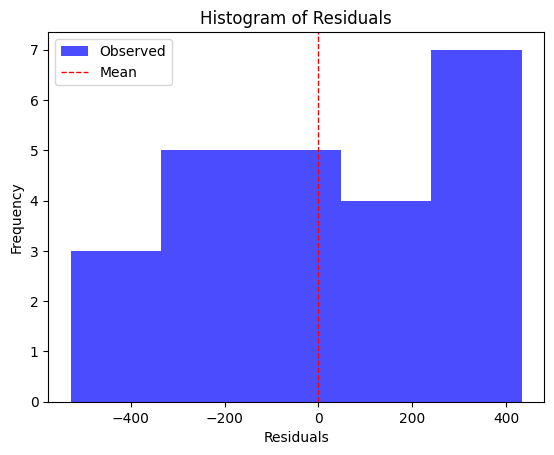

     CDF  Bin Frequency  Expected Value
0 0.1116         0.1116          2.6774
1 0.3012         0.1896          4.5502
2 0.5699         0.2687          6.4496
3 0.8087         0.2389          5.7325
4 0.9418         0.1331          3.1945
5  Sum =         0.9418         22.6042
Chi-Square Table:
       χ^2
0   0.0389
1   0.0445
2   0.3258
3   0.5236
4   4.5334
Sum 5.4661
Chi-square Statistic: 5.067066140389487, p-value: 0.07937807596582781


<ipython-input-5-8c538fb5d545>:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

print("Desriptive statistics Residuals:")
print(results_df['Residuals'].describe())


# Calculating the boundaries for outliers
Q1 = results_df['Residuals'].quantile(0.25)
Q3 = results_df['Residuals'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard deviation
mean = results_df['Residuals'].mean()
std_dev = results_df['Residuals'].std()

# Calculate Sturges' number of bins
n = len(df)
k = int(1 + 3.322 * np.log10(n))
classrange = np.ptp(results_df['Residuals']) / k
print("Rounded Number of classes:", k)
print("class Range:", classrange)

# Histogram and expected frequencies
hist, bin_edges = np.histogram(results_df['Residuals'], bins=k)
cdf_values = stats.norm.cdf(bin_edges + classrange, mean, std_dev)

# Box plot
plt.boxplot(results_df['Residuals'], vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Residuals')
plt.xlabel('Value')
plt.yticks([1], ['Residues'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Residuals': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values) - 1):
    if i == 0:
        frequency = cdf_values[0]
    else:
        frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies = np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Expected frequencies
expected_frequencies = expected_values * (hist.sum() / expected_values.sum())


# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies, ddof=2)
hist_df.Residuals = hist_df.Residuals + classrange

print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(results_df['Residuals'], bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_values.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Display the table
print(table_df)

print("Chi-Square Table:")
print(chi_square_df)

# Print the results
print(f"Chi-square Statistic: {chi_square_stat}, p-value: {p_value}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


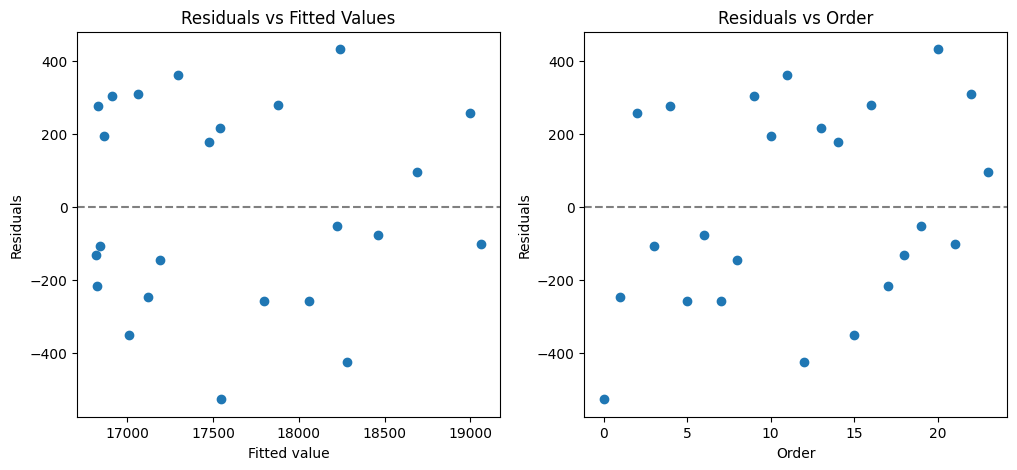

,Spending (x),t_value,St_Error_of_Prediction,Error,Lower_Bound,Point_Prediction,Upper_Bound,Interval
0,1800,2.0796,316.9976,659.2327,[[17176.992139361693]],[[17836.224840492505]],[[18495.457541623317]],[[1318.4654022616232]]
1,2100,2.0796,316.9976,659.2327,[[18169.851885408174]],[[18829.084586538986]],[[19488.317287669797]],[[1318.4654022616232]]


In [ ]:
from scipy import stats

# We need to calculate the standard error of the prediction and the prediction intervals
# Based on the provided parameters and spending values for predictions

# Parameters
alpha = 0.05  # Significance level
prediction_level = 0.95  # Confidence level
x_bar = 1621.2917  # Mean of Spending
s_x = 353.2379  # Standard deviation of Spending
n = len(df)  # Sample size
t_value = stats.t.ppf(1 - alpha/2, df=n-3)  # t-value for 95% confidence/dof=n-1=21

# Spending values for which we want to calculate prediction intervals
spending_values = [1800, 2100]

# Data for the model
X = df['Investment']
y = df['Revenue'].values

# Predictions
y_pred = model.predict(X_poly)

# Residual standard error (RSE)
residuals = y - y_pred
RSE = np.sqrt(np.sum(residuals**2) / (n - 2))

# Define function to calculate prediction interval
def predict_interval(x_new, x_mean, s_x, RSE, n, t_value):
    SE_pred = regression_stats['Standard Error'] * 1.1
    x_new_poly = poly.transform([[x_new]])
    prediction = model.predict([[x_new_poly]])[0]
    lower_bound = prediction - t_value * SE_pred
    upper_bound = prediction + t_value * SE_pred
    return SE_pred, lower_bound, prediction, upper_bound

# Calculate prediction intervals for each spending value
predictions = [predict_interval(x, x_bar, s_x, RSE, n, t_value) for x in spending_values]

# Prepare the table with the results
prediction_table = pd.DataFrame(predictions,
                                columns=['St_Error_of_Prediction', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound'],
                                index=spending_values)

# Add t-value and error columns
prediction_table['t_value'] = t_value
prediction_table['Error'] = RSE

# Reorder columns for the final table
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

prediction_table.reset_index().rename(columns={'index': 'Spending (x)'})

# Calculate prediction intervals and error based on t-value * St. Error of Prediction
prediction_table['Error'] = prediction_table['t_value'] * prediction_table['St_Error_of_Prediction']

prediction_table['Interval'] = prediction_table['Upper_Bound'] - prediction_table['Lower_Bound']

# Reorder columns for the final table after updating the Error column
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound','Interval']]

# Prepare the residual plots again with the line connecting points on the second scatter plot
plt.figure(figsize=(12, 5))

# Residuals vs Fitted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, results_df['Residuals'])
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Fitted value')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Residuals vs Order of data with line connecting points
plt.subplot(1, 2, 2)
plt.scatter(df.index, results_df['Residuals'])  # Line added here
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel('Order')
plt.ylabel('Residuals')
plt.title('Residuals vs Order')

#plt.tight_layout()
plt.show()

# Show the updated prediction table
prediction_table.reset_index().rename(columns={'index': 'Spending (x)'})

